In [2]:
import csv

# Path to your TSV file
#tsv_file_path = 'C:\\Users\\Daniela\\xmen\\Cantemist\\ICD-O valid codes DP.tsv'
tsv_file_path = "Cantemist/ICD-O valid codes DP.tsv"

# Open the TSV file using the 'r' mode (read mode)
with open(tsv_file_path, 'r', newline='', encoding='utf-8') as tsv_file:
    # Create a CSV reader object with tab delimiter
    tsv_reader = csv.reader(tsv_file, delimiter='\t')


FileNotFoundError: [Errno 2] No such file or directory: 'Cantemist/ICD-O valid codes DP.tsv'

In [142]:
# Contador de líneas con la primera celda llena y la segunda celda vacía
count_lines = 0

with open('icdo-valid-codes.tsv', 'r', encoding='UTF-8') as tsv_file:
    for line in tsv_file:
            count_lines += 1

print(count_lines)

58063


In [59]:
# Count at 0
count_descrip = 0

with open('icdo-valid-codes.tsv', 'r', encoding='UTF-8') as tsv_file:
    for line in tsv_file:
        # Divide the row in columns using tabs as divider
        columns = line.strip().split('\t')
        # Verify if there are 2 more or equal columns and verifiy
        # columns[0].strip verifies if the cell has content after removing the white spaces. If it's empty, will return False
        # True = 1, False = 0
        # if the cell has something after removing the white spaces, then returns True --> +1
        # if both columns have content per row, then it will add a true
        if len(columns) >= 2 and columns[0].strip() and columns[1].strip():
            # Incrementar el contador de líneas
            count_descrip += 1

print("ICD-O codes with description in Candemist data base:", count_descrip)

ICD-O codes with description in Candemist data base: 4206


In [60]:
print("Percentage of codes with description in Candemist data base",(4206/58061)*100,"%")


Percentage of codes with description in Candemist data base 7.244105337489881 %


In [61]:
import zipfile

#Select rout
zip_file_path ='C:\\Users\\Daniela\\Desktop\\HandsonAI\\data\\datasets\\cantemist.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # list all the files in the zip folder
    file_list = zip_ref.namelist()

    # Print first 10 files of the zip folder
    print("Files in zip folder:")
    for file in file_list[:10]:
        print(file)

Files in zip folder:
dev-set1-to-publish/
dev-set1-to-publish/cantemist-norm/
dev-set1-to-publish/cantemist-norm/cc_onco861.ann
dev-set1-to-publish/cantemist-norm/cc_onco716.ann
dev-set1-to-publish/cantemist-norm/cc_onco11.ann
dev-set1-to-publish/cantemist-norm/cc_onco106.ann
dev-set1-to-publish/cantemist-norm/cc_onco563.ann
dev-set1-to-publish/cantemist-norm/cc_onco43.ann
dev-set1-to-publish/cantemist-norm/cc_onco224.ann
dev-set1-to-publish/cantemist-norm/cc_onco740.ann


In [62]:
import zipfile
import os

def get_unique_files(zip_file_path):
    unique_files = set()

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            # Verify if file starts 'cc_onco'
            if os.path.basename(file_name).startswith('cc_onco'):
                unique_files.add(os.path.basename(file_name))

    return unique_files

unique_files = get_unique_files(zip_file_path)
q_unique_files = len(unique_files)
print("Number of unique files in the ZIP:", q_unique_files)

Number of unique files in the ZIP: 2501


In [103]:
import pandas as pd
# Lists to store info
file_names = []
annotation_numbers = []
annotation_labels = []
annotation_ICDO_codes = []

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        # Extract the name of the file
        file_name = file_info.filename
        # Determine the file type --> only requires ann, then we split the file name by the "." and review the last one created [-1]
        file_type = file_name.split('.')[-1].lower()
        if file_type == 'ann':
            # read the content of the file ---> UTF-8 is needed
            file_content = zip_ref.read(file_name).decode('utf-8')
        # Divide the content in lines, in order to extract the annotations --> divider is a new line: \n
            for line in file_content.split('\n'):
                if line.startswith("#"): #annotation of the code starts with "#"
                    parts = line.split('\t') #tabular divider
                    if len(parts) >= 3:
                        annotation_numbers.append(parts[0]) #column 1
                        annotation_labels.append(parts[1]) #column 2
                        annotation_ICDO_codes.append(parts[2]) #column 3
                        file_names.append(file_name)

# Create a DataFrame in Pandas with the data
df = pd.DataFrame({
    'File': file_names,
    'Number of annotation': annotation_numbers,
    'Label of annotation': annotation_labels,
    'ICD-O code': annotation_ICDO_codes,
})
print(df)

                                                    File Number of annotation  \
0      dev-set1-to-publish/cantemist-norm/cc_onco861.ann                   #1   
1      dev-set1-to-publish/cantemist-norm/cc_onco861.ann                   #2   
2      dev-set1-to-publish/cantemist-norm/cc_onco861.ann                   #3   
3      dev-set1-to-publish/cantemist-norm/cc_onco861.ann                   #4   
4      dev-set1-to-publish/cantemist-norm/cc_onco861.ann                   #5   
...                                                  ...                  ...   
12392  train-set-to-publish/cantemist-norm/cc_onco644...                   #9   
12393  train-set-to-publish/cantemist-norm/cc_onco644...                  #10   
12394  train-set-to-publish/cantemist-norm/cc_onco644...                  #11   
12395  train-set-to-publish/cantemist-norm/cc_onco644...                  #12   
12396  train-set-to-publish/cantemist-norm/cc_onco644...                  #13   

      Label of annotation I

In [64]:
# Count the unique ICD-O
unique_icdo = df['ICD-O code'].nunique()

print("Q unique ICD-O:", unique_icdo)

Q unique ICD-O: 743


In [69]:
annotations_per_file = df['File'].value_counts()

print("Q of annotations per file:")
print(annotations_per_file)

Q of annotations per file:
File
dev-set1-to-publish/cantemist-norm/cc_onco299.ann     50
dev-set1-to-publish/cantemist-norm/cc_onco258.ann     50
dev-set2-to-publish/cantemist-norm/cc_onco1241.ann    43
train-set-to-publish/cantemist-norm/cc_onco395.ann    42
train-set-to-publish/cantemist-norm/cc_onco572.ann    40
                                                      ..
train-set-to-publish/cantemist-norm/cc_onco709.ann     1
dev-set2-to-publish/cantemist-norm/cc_onco1314.ann     1
train-set-to-publish/cantemist-norm/cc_onco728.ann     1
dev-set2-to-publish/cantemist-norm/cc_onco1054.ann     1
dev-set2-to-publish/cantemist-norm/cc_onco1138.ann     1
Name: count, Length: 1000, dtype: int64


In [143]:
# Mean of annotations per file
mean_annotations = annotations_per_file.mean()
print("Mean of annotations per file:", mean_annotations)
# Meadian of annotations per file
median_annotations = annotations_per_file.median()
print("Meadian of annotations per file:", median_annotations)


Mean of annotations per file: 12.397
Meadian of annotations per file: 11.0


In [136]:
!pip install matplotlib

In [137]:
! pip install seaborn

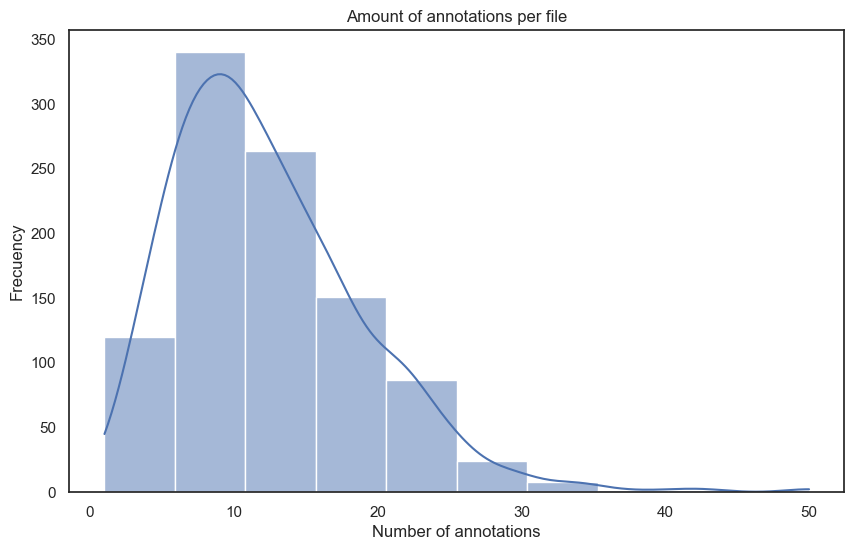

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style of the plot
sns.set(style="white")

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=annotations_per_file, bins=10, kde=True)
plt.title('Amount of annotations per file')
plt.xlabel('Number of annotations')
plt.ylabel('Frecuency')
plt.show()

In [99]:
# Group by 'ICD-O code' and 'Label of annotation', then count the occurrences

#1) create groups of rows where the values in the 'ICD-O code' column are the same.
#2) Obtaine the size of each group
#3) .reset_index(name='Frequency'): This resets the index of the resulting DataFrame and assigns a new name 'Frequency' to the column containing the sizes of the groups. 
#By default, when you perform a groupby operation in pandas, the resulting DataFrame has a hierarchical index, which may not always be convenient. 
#Resetting the index converts the group labels back into columns, and you can specify the name of the column containing the group sizes using the name parameter.
frequency_df = df.groupby(['ICD-O code']).size().reset_index(name='Frequency')

# Do a top 20 of most frequent codes
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)
top_20_df = frequency_df.head(20)

print(top_20_df)

    ICD-O code  Frequency
12      8000/6       4480
1       8000/1       2182
7       8000/3        756
143     8140/3        395
42      8010/3        188
330     8500/3        179
152     8140/6        178
411     8720/3        137
52      8010/9        112
16      8001/1        107
91      8070/3         93
18      8001/3         90
48      8010/6         85
75      8041/3         74
208     8240/3         71
413     8720/6         70
497     8936/3         44
335    8500/33         44
149    8140/33         44
677     9590/3         43


In [120]:
tsv_df = pd.read_csv(tsv_file_path, sep='\t')

# Merge top_20_df with the TSV file, using the ICD-O valid code as key (like VLOOKUP in excel)
merged_top20_df = pd.merge(top_20_df, tsv_df, on='ICD-O code', how='left', indicator = True)

print(merged_top20_df)

   ICD-O code  Frequency                                      Description 1  \
0      8000/6       4480                              Neoplasia metastásica   
1      8000/1       2182      Neoplasia de benignidad o malignidad incierta   
2      8000/3        756                                  Neoplasia maligna   
3      8140/3        395                                Adenocarcinoma, SAI   
4      8010/3        188                                     Carcinoma, SAI   
5      8500/3        179                  Carcinoma ductal infiltrante, SAI   
6      8140/6        178                    Adenocarcinoma metastásico, SAI   
7      8720/3        137                              Melanoma maligno, SAI   
8      8010/9        112                                     Carcinomatosis   
9      8001/1        107  Células tumorales de benignidad o malignidad i...   
10     8070/3         93                         Carcinoma epidermoide, SAI   
11     8001/3         90                         Cél

In [90]:
# To copy this in ppt so it looks like a table
#merged_df.to_clipboard(index=False, sep='\t')

In [157]:
merged_top20_df.to_csv('frequency_top20.csv', index=False)

In [123]:
#Merge the codes from Cantemist with ICD-O valid name
merged_allcodes_df = pd.merge(frequency_df, tsv_df, on='ICD-O code', how='left', indicator = True)

print(merged_allcodes_df)

    ICD-O code  Frequency                                    Description 1  \
0       8000/6       4480                            Neoplasia metastásica   
1       8000/1       2182    Neoplasia de benignidad o malignidad incierta   
2       8000/3        756                                Neoplasia maligna   
3       8140/3        395                              Adenocarcinoma, SAI   
4       8010/3        188                                   Carcinoma, SAI   
..         ...        ...                                              ...   
738   8972/3/H          1                                              NaN   
739     8370/6          1  Carcinoma de la corteza suprarrenal, metástasis   
740     8964/6          1  Sarcoma de células claras del riñón, metástasis   
741     8380/0          1                       Adenoma endometrioide, SAI   
742  8070/31/H          1                                              NaN   

                                     Description 2 _merge  
0  

In [154]:
# Filter the results to find the ones where 'Description 1' is empty
empty_desc1_df = merged_allcodes_df[merged_allcodes_df['Description 1'].isnull()]

print(empty_desc1_df)

    ICD-O code  Frequency Description 1 Description 2 _merge
29    8010/3/H         31           NaN           NaN   both
45    8000/1/H         22           NaN           NaN   both
50      8800/1         19           NaN           NaN   both
60    8000/3/H         15           NaN           NaN   both
89    8140/3/H         10           NaN           NaN   both
..         ...        ...           ...           ...    ...
721    8441/63          1           NaN           NaN   both
722    8936/61          1           NaN           NaN   both
736    8004/64          1           NaN           NaN   both
738   8972/3/H          1           NaN           NaN   both
742  8070/31/H          1           NaN           NaN   both

[155 rows x 5 columns]


In [162]:
# Save data frame as csv
empty_desc1_df.to_csv('empty_desc1_freq.csv', index=False)

In [128]:
# List to save the rows from the .ann files
all_annotations = []
all_notes = []

# Read the files inside the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        # Extract name of the file
        file_name = file_info.filename
        # Determine type of file
        file_type = file_name.split('.')[-1].lower()
        if file_type == 'ann':
            # Read content
            file_content = zip_ref.read(file_name).decode('utf-8')
            lines = file_content.splitlines()
            
            # Save the ones that starts with T as annotation, and # for the ICD-O code
            for line in lines:
                if line.startswith('T'):
                    parts = line.strip().split('\t')
                    annotation_id = parts[0]
                    annotation_info = parts[1]
                    annotation_text = parts[2]
                    all_annotations.append((file_name, annotation_id, annotation_info, annotation_text))
                elif line.startswith('#'):
                    parts = line.strip().split('\t')
                    note_id = parts[0]
                    annotation_ref = parts[1].split()[1]
                    note_text = parts[2]
                    all_notes.append((file_name,annotation_ref, note_text))

# Create dataframe
annotations_df = pd.DataFrame(all_annotations, columns=['File_Name', 'Annotation_ID', 'Info', 'Text'])
notes_df = pd.DataFrame(all_notes, columns=['File_Name', 'Annotation_Ref', 'ICD-O code'])

# Combine dataframe
combined_df = pd.merge(annotations_df, notes_df, left_on=['File_Name', 'Annotation_ID'], right_on=['File_Name', 'Annotation_Ref'])

# Re-organize columns
combined_df = combined_df[['File_Name','Text', 'ICD-O code']]

print(combined_df[:10])

                                           File_Name  \
0  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
1  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
2  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
3  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
4  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
5  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
6  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
7  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
8  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   
9  dev-set1-to-publish/cantemist-norm/cc_onco861.ann   

                        Text ICD-O code  
0  afectación de médula ósea     8000/6  
1          infiltración ósea     8000/6  
2              neuroblastoma     9500/3  
3              neuroblastoma     9500/3  
4              neuroblastoma     9500/3  
5                    tumoral     8000/1  
6                    tumoral     8000/1  
7                    tumoral     8000/1  
8    

In [158]:
# Read data frame
df = pd.read_csv('C:\\Users\\Daniela\\xmen\\Cantemist\\All annotations Cantemist.tsv', sep='\t')

# Group codes and count unique descriptions
description_counts = df.groupby('ICD-O code')['Text'].nunique().reset_index()

# Rename the columns
description_counts.columns = ['ICD-O code', 'count_different_descriptions']

# Order from most to less frecuency
description_counts_sorted = descripcion_counts.sort_values(by='count_different_descriptions', ascending=False)

#print top 20
print(description_counts_sorted[:20])

# save it as csv
description_counts_sorted.to_csv('count_different_descriptions.csv', index=False)


    ICD-O code  count_different_descriptions
12      8000/6                          1264
152     8140/6                           129
48      8010/6                            39
7       8000/3                            36
335    8500/33                            35
413     8720/6                            33
1       8000/1                            32
259     8310/6                            29
149    8140/33                            25
100     8070/6                            25
79      8041/6                            24
338     8500/6                            24
333    8500/32                            24
75      8041/3                            23
330     8500/3                            20
208     8240/3                            19
145    8140/31                            19
546     9064/3                            18
320     8490/3                            18
83      8046/3                            18


In [79]:
descripcion_counts_sorted.sum()

ICD-O code                      8000/68140/68010/68000/38500/338720/68000/1831...
count_different_descriptions                                                 3658
dtype: object

In [160]:
selected_code = "8046/3"
desc_selected_code = df[df['ICD-O code'] == selected_code]['Text'].unique()
print(f"The different descriptions for the code '{selected_code}' are:")
for description in desc_selected_code:
    print(description)

The different descriptions for the code '8046/3' are:
CPNM
cáncer pulmonar de células no pequeñas
CNMP
NSCLC
cáncer de pulmón no microcítico
carcinoma no microcítico
carcinoma de célula no pequeña
carcinoma pulmonar de células no pequeñas
Carcinoma de pulmón no Célula pequeña
carcinoma no célula pequeña
carcinoma de células no pequeñas
Carcinoma de pulmón no microcítico
CPCNP
CPNCP
cáncer no microcítico
adenocarcinoma pulmonar de célula no pequeña
Carcinoma de célula no pequeña
carcinoma no de células pequeñas


In [133]:
merged_top20nomatch_df = pd.merge(top_20_nomatch_df, combined_df, on='ICD-O code', how='inner')

In [134]:
print(merged_top20nomatch_df)

   ICD-O code  Frequency                                          File_Name  \
0    8000/1/H          1   dev-set1-to-publish/cantemist-norm/cc_onco11.ann   
1    8000/1/H          1   dev-set1-to-publish/cantemist-norm/cc_onco43.ann   
2    8000/1/H          1   dev-set1-to-publish/cantemist-norm/cc_onco43.ann   
3    8000/1/H          1  dev-set1-to-publish/cantemist-norm/cc_onco258.ann   
4    8000/1/H          1  dev-set2-to-publish/cantemist-norm/cc_onco1318...   
..        ...        ...                                                ...   
69   8970/3/H          1  dev-set1-to-publish/cantemist-norm/cc_onco229.ann   
70   8972/3/H          1  dev-set2-to-publish/cantemist-norm/cc_onco1187...   
71   8771/3/H          1  train-set-to-publish/cantemist-norm/cc_onco903...   
72    8726/02          1  train-set-to-publish/cantemist-norm/cc_onco572...   
73    8726/02          1  train-set-to-publish/cantemist-norm/cc_onco572...   

                                                 Te

In [161]:
# Save as dataframe
merged_top20nomatch_df.to_csv('top20_no_match_descr.csv', index=False)

In [1]:
import pandas as pd

# Route to tsv file
file_path = 'C:\\Users\\Daniela\\xmen\\Cantemist\\All annotations Cantemist.tsv'

# Read the csv file
df = pd.read_csv(file_path, sep='\t')

#Show original columns
print("Original order:", df.columns.tolist())

# Reorganize cols: col3 -> col 1, col 1 -> col 3
df = df[[df.columns[2], df.columns[1], df.columns[0]]]

# Show how it looks now
print("Re-organized columns:", df.columns.tolist())

# Save as tsv file
new_file_path = 'C:\\Users\\Daniela\\xmen\\Cantemist\\All_annotations_cantemist_2.tsv'
df.to_csv(new_file_path, sep='\t', index=False)

print(f"rute of new file: {new_file_path}")


Columnas originales: ['File_Name', 'Text', 'ICD-O code']
Columnas reordenadas: ['ICD-O code', 'Text', 'File_Name']
Archivo guardado en: C:\Users\Daniela\xmen\Cantemist\All_annotations_cantemist_2.tsv
